In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' No hay filas duplicadas.
'''

len(df.drop_duplicates()) 

240000

In [5]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [6]:
''' Hay todo tipo de datos incorrectos
'''

df[['direccion', 'descripcion', 'titulo']]

,direccion,descripcion,titulo
0,Avenida Division del Norte 2005,"depto. interior de 80.15m2, consta de sala com...",depto. tipo a-402
1,AV. MEXICO,"<p>entre sonora y guerrero, atr&aacute;s del h...",condominio horizontal en venta
2,Urbi Tonala,descripcion \nla mejor ubicacion residencial e...,casa en venta urbi 3 recamaras tonala
3,IGNACIO MANUEL ALTAMIRANO 128,casa en privada con caseta de vigilancia casas...,casa sola en toluca zinacantepec con credito i...
4,PASEOS DEL SOL,bonito departamento en excelentes condiciones ...,paseos del sol
5,Condominio Tlalpan 2B,"amplio departamento, estancia de sala y comedo...",departamento en venta taxqueña
6,NaN,"ubicada en esquina, pertenece san lorenzo agen...",de oportunidad casa en san lorenzo
7,condominio el trebol,casa emilia en venta playa del carmenfracciona...,casa emilia en venta en selvamar playa del carmen
8,BUENAVISTA DEPTOS CON SUBSIDIO,<p>pre-venta de preciosos departamento ecologi...,pre- venta preciosos depas 2 recamaras con sub...
9,Av. Morelos,"terreno de 5.500m2 bardeado, uso de suelo h-20...",terreno


In [7]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format') #Sólo por si posteriormente se cambia el formato de los float
df['precio'].sample(5)

214725     370000.0
183458     489028.0
163946    2560000.0
31742     2300000.0
110928     900000.0
Name: precio, dtype: float64

In [8]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [9]:
''' Reacomodamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.iloc[1]

ID                                                                      53461
Titulo                                         condominio horizontal en venta
TipoPropiedad                                              Casa en condominio
Precio                                                                3.6e+06
Fecha                                                     2013-06-28 00:00:00
Antiguedad                                                                 10
MetrosCuadradosCubiertos                                                  268
MetrosCuadradosTotales                                                    180
Descripcion                 <p>entre sonora y guerrero, atr&aacute;s del h...
CantHabitaciones                                                            3
CantGarages                                                                 2
CantBanos                                                                   2
IDZona                                                          

In [10]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11087703704834

In [11]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antiguedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBanos'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299999, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12525000.0]

In [12]:
''' Adecuación de tipos para columnas sin NaN. 
'''

#int
dfok['ID'] = dfok['ID'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMultiples'] = dfok['TieneUsosMultiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

In [13]:
dfok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
ID                          240000 non-null uint32
Titulo                      234613 non-null object
TipoPropiedad               239954 non-null object
Precio                      240000 non-null uint32
Fecha                       240000 non-null datetime64[ns]
Antiguedad                  196445 non-null float64
MetrosCuadradosCubiertos    222600 non-null float64
MetrosCuadradosTotales      188533 non-null float64
Descripcion                 238381 non-null object
CantHabitaciones            217529 non-null float64
CantGarages                 202235 non-null float64
CantBanos                   213779 non-null float64
IDZona                      211379 non-null float64
Direccion                   186928 non-null object
Ciudad                      239628 non-null object
Provincia                   239845 non-null object
Latitud                     116512 non-null float64
Longit

In [14]:
"""''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() """;

In [15]:
pd.options.display.max_colwidth = 1000 ## Ver strings largos
dfok[ ( dfok['MetrosCuadradosCubiertos'] > dfok['MetrosCuadradosTotales'] ) & ( dfok['ID'] >= 47890 ) ].head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
1,53461,condominio horizontal en venta,Casa en condominio,3600000,2013-06-28,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,False,False,False,True,True
12,47890,hermosa casa en zibata queretaro 170m²,Casa,1500000,2013-08-12,0.0,170.0,141.0,"<p><strong>casa </strong>en venta en fraccionamiento con campo de golf <strong>zibat&aacute;</strong>, 141.4 m de terreno, 170 m de construcci&oacute;n, en esquina, jardin de 98 m, 3 recamaras, 2 1/2 ba&ntilde;os, cocina, cochera 2 autos.</p>",3.0,2.0,2.0,83666.0,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,20.682878,-100.317503,False,True,False,True,True
13,130216,casa matias romero - sión bancaria,Casa,3000000,2015-03-31,20.0,227.0,185.0,"flamante casa habitación en condominio horizontal, desarrollada en 3 niveles. planta baja: estancia, comedor, cocina con desayunador, sala, cuarto de tv, 3 recamaras, 2 baños completos, patio de servicio, cuarto de servicio con baño, estacionamiento para 2 vehículos con cochera semicubierta; ubicada en la calle matías romero, colonia del valle. la mejor zona de méxico. 3 niveles, cochera, condominio horizontal. 227 m2 construcción 185 m2 terreno etapa - emplazamiento entrega - 36 meses solo pagos de contado. garantía de entrega**invierte 3 ya que su valor comercial es de $6. los remates bancarios son una gran opción de sión y no representan riesgo alguno.",NaN,0.0,NaN,50003995.0,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,19.374895,-99.149519,False,False,False,False,False
14,181436,casa en venta en valle real,Casa,5300000,2014-11-25,NaN,250.0,231.0,"pre venta de residencia en la toscana con excelente distribución, cuenta con vestidor y baño todas las recamaras.",NaN,2.0,4.0,47732.0,NaN,Zapopan,Jalisco,20.729601,-103.431993,False,False,False,False,False
21,224513,casa en venta en querétaro,Casa en condominio,2300000,2016-02-01,NaN,181.0,150.0,"nocnok id: mx15-bk0340. hermosa casa en conjunto privado, sala, comedor, cocina integral con cubierta de granito, 3 recámaras, principal con vestidor, 3.5 baños, cocina integral, sala de tv, bodega, patio de servicio, roof, jardín, hermosa vista y 2 estacionamientos.\nzibatá?a 5 min. del la universidad anahuác, a 20 min. de av. b. quintana por anillo vial fray junípero serra y 20 min. de plaza antea",3.0,2.0,4.0,NaN,NaN,Querétaro,Querétaro,NaN,NaN,False,False,False,False,False


#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, pero si se mira la descripción se ve que esto no es un error: es sólo una nomenclatura confusa.

In [16]:
pd.options.display.max_colwidth = 100 #Volver a strings más cortos 
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

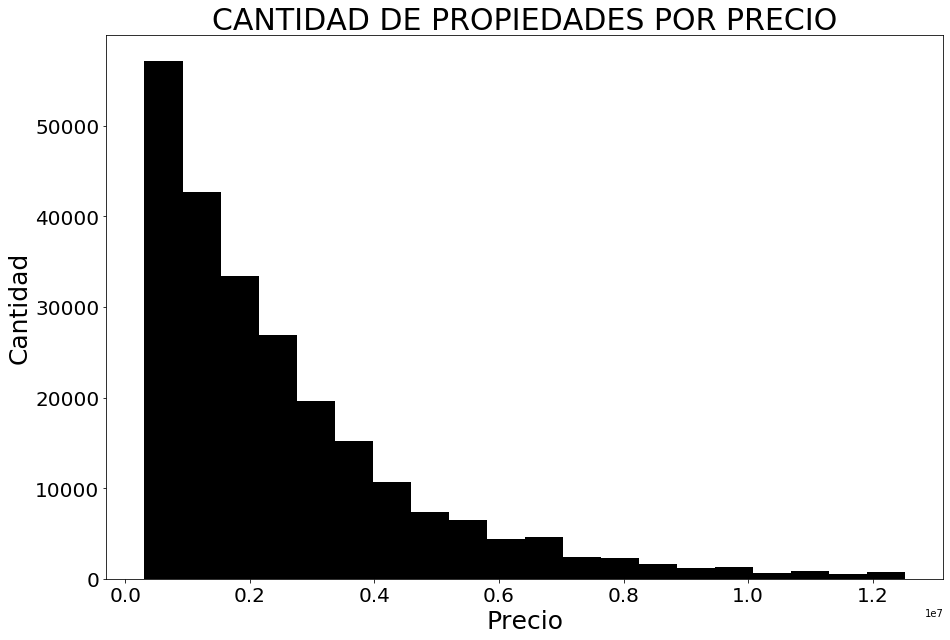

In [17]:
''' ¿Hay más propiedades caras o baratas?'''

# Tamaño del gráfico
plt.figure(figsize = (15, 10));

# Tamaño de los títulos de los ejes
plt.xlabel("Precio", fontsize = 25);
plt.ylabel("Cantidad", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("CANTIDAD DE PROPIEDADES POR PRECIO")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
    # plt.xticks(rotation = 90)

# Límites para cada coordenada
    # plt.ylim([13, 34]);
    # plt.xlim([-116, -86]);

# Tipo de gráficok
plt.hist(dfok['Precio'], color = 'black', bins = 20);

''' Los mayores precios se encuentran concentrados para la minoría de las propiedades. ''';

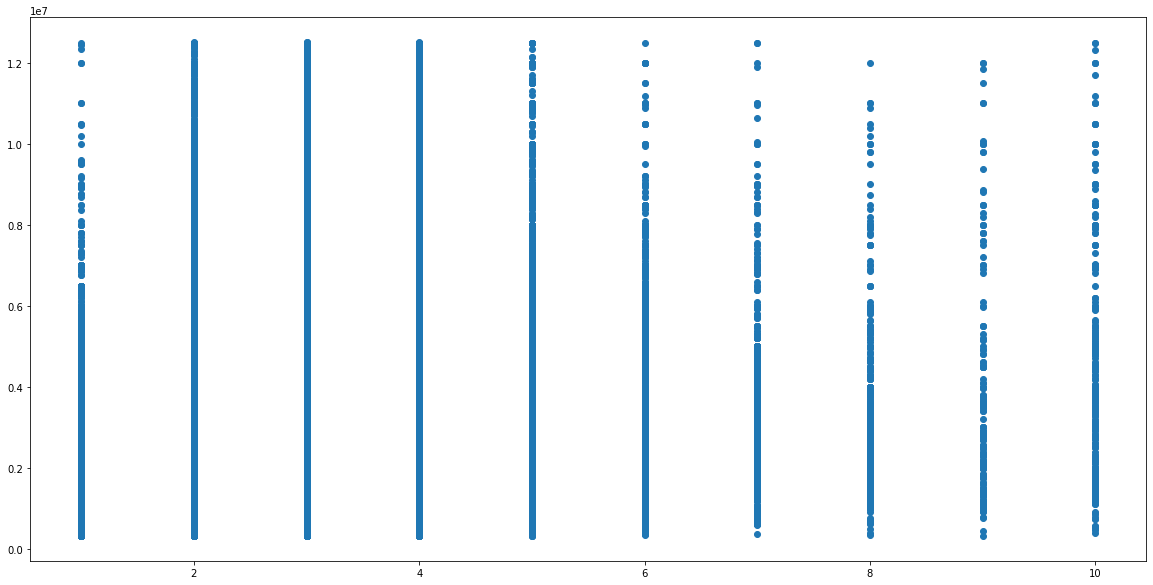

In [18]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (20, 10))

# Variables a graficar
x = dfok['CantHabitaciones']
y = dfok['Precio']

# Tipo de gráfico
plt.scatter(x, y)

''' No se aprecia una tendencia clara. ''';

' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.\n'

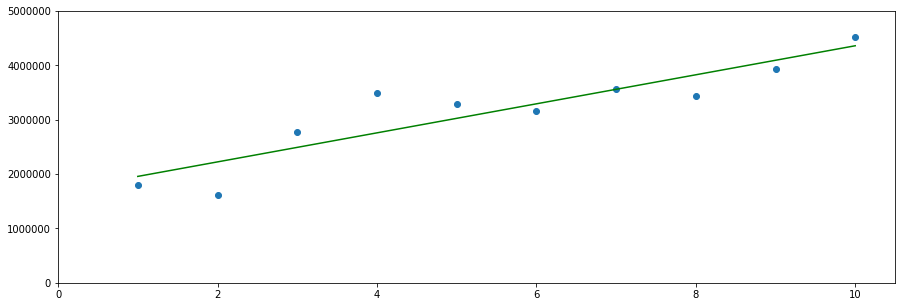

In [19]:
''' ¿El precio promedio es proporcional a la cantidad de habitaciones?
'''
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['Precio']

plt.figure(figsize = (15, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

# Tipo de gráfico
plt.scatter(x, y);
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "g")

''' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.
'''

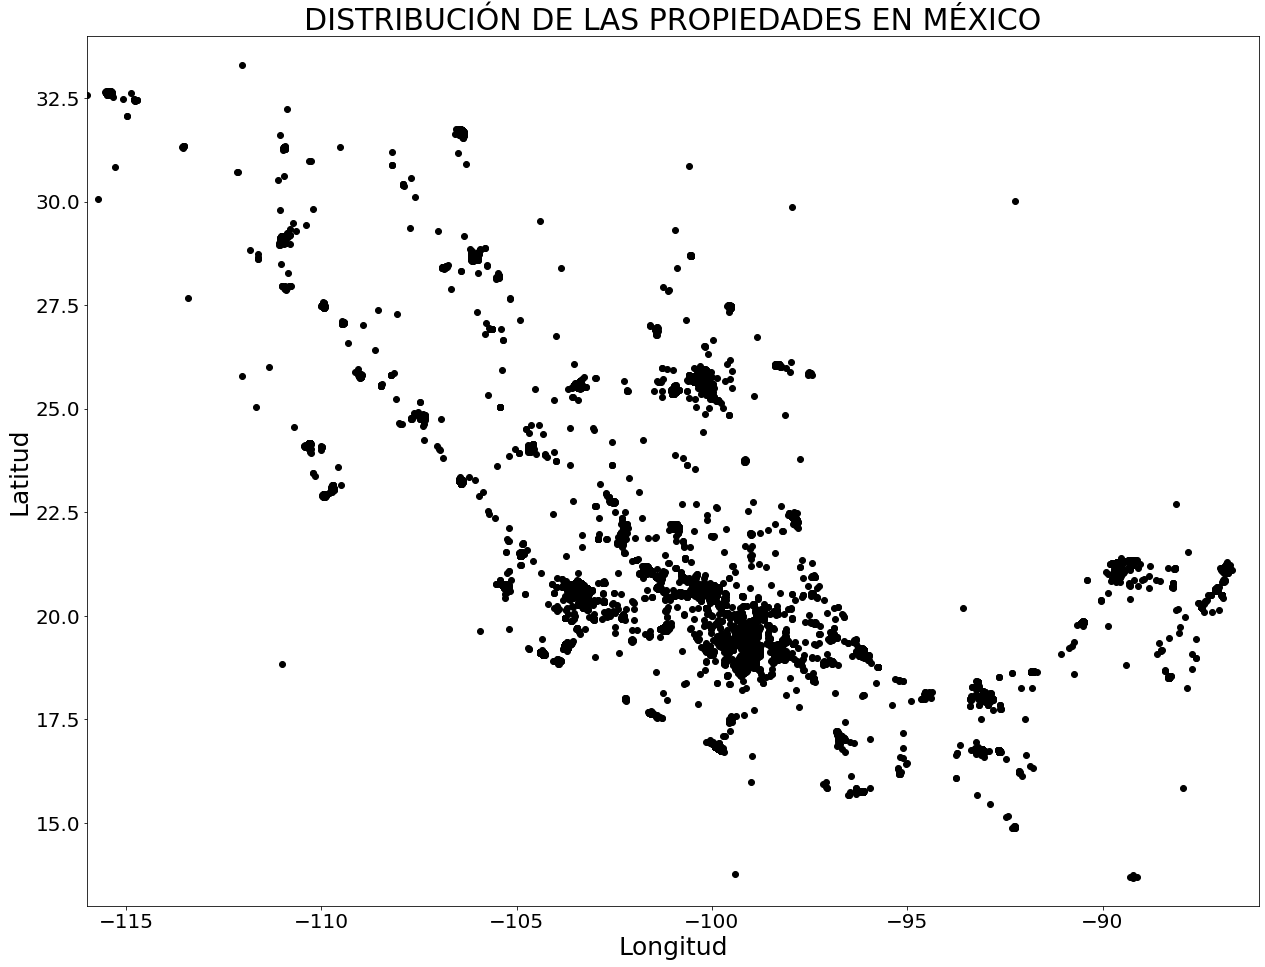

In [20]:
''' México está en el hemisferio norte, por lo que la latitud debe ser positiva
    Además está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa'''

# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

# Tamaño del gráfico
grafico = plt.figure(figsize = (21, 16));

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 25);
plt.ylabel("Latitud", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("DISTRIBUCIÓN DE LAS PROPIEDADES EN MÉXICO")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

# Tipo de gráficok
plt.scatter(x, y, color = "black");

In [21]:
''' Propiedades con coordenadas incorrectas
'''

len(dfok[ (dfok['Latitud'] > 34) | (dfok['Latitud'] < 13) | (dfok['Longitud'] > -86) | (dfok['Longitud'] < -116) ])


2206

<BarContainer object of 24 artists>

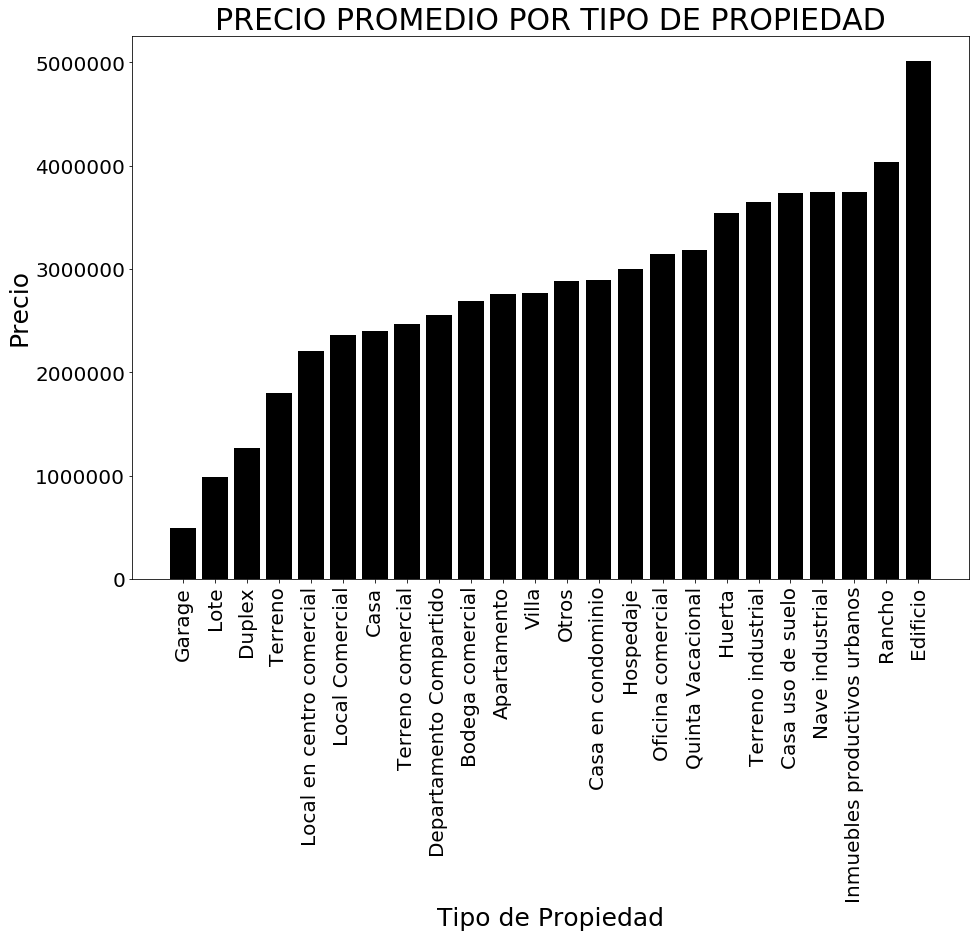

In [22]:
''' ¿Cuáles propiedades son más caras en promedio? '''

dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), index = dfok['TipoPropiedad'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('TipoPropiedad').mean()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna() #99%
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['TipoPropiedad'] = dfPorPropiedad['TipoPropiedad'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10));

# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 25);
plt.ylabel("Precio", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("PRECIO PROMEDIO POR TIPO DE PROPIEDAD")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


In [49]:
len(dfok['TipoPropiedad']) - dfok['TipoPropiedad'].count()

46

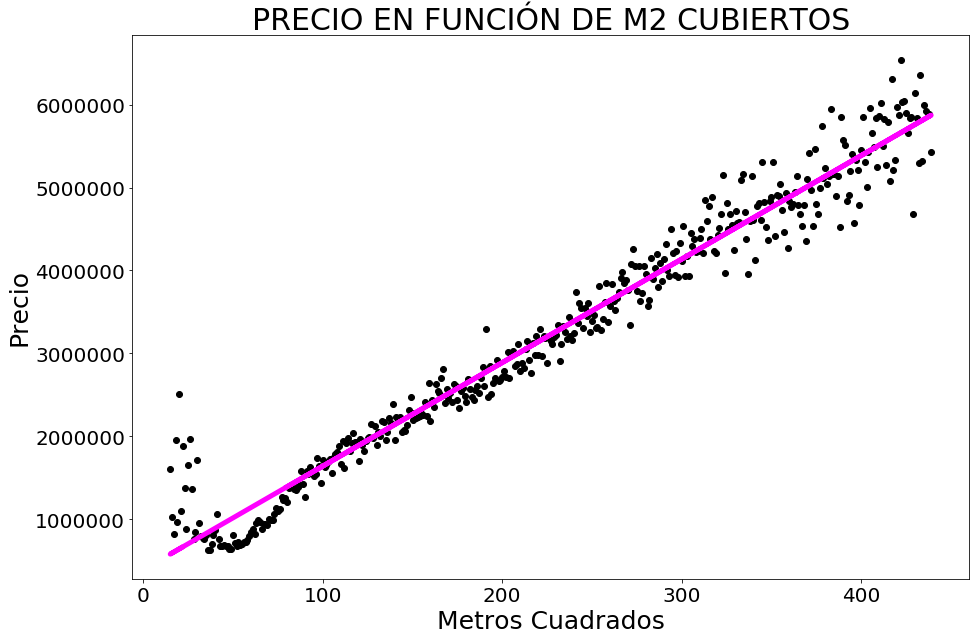

In [23]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosCubiertos'].unique(), 
                                index = dfok['MetrosCuadradosCubiertos'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosCubiertos').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 92%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 25);
plt.ylabel("Precio", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("PRECIO EN FUNCIÓN DE M2 CUBIERTOS")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "magenta", linewidth = 5)


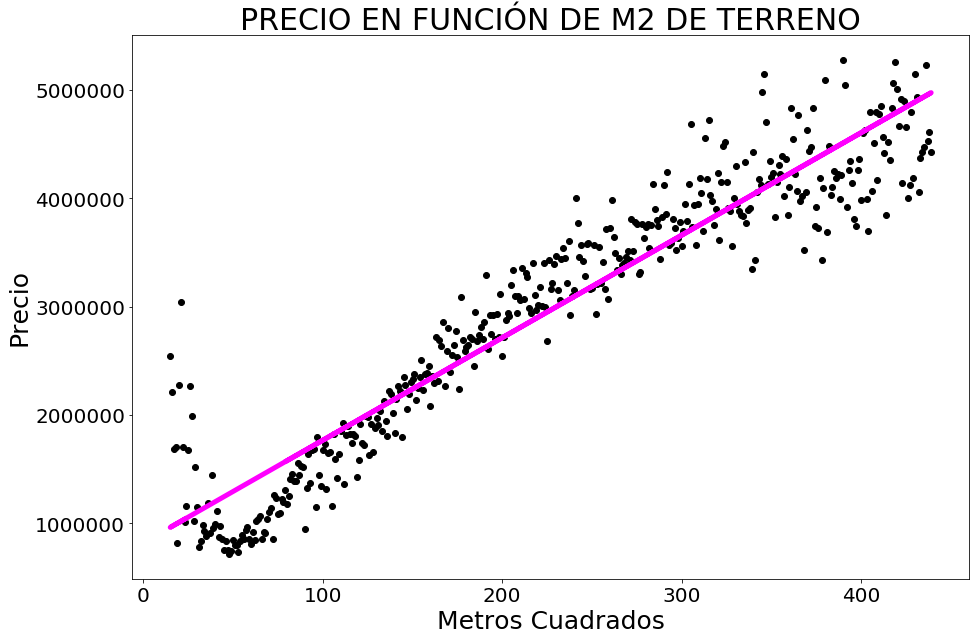

In [24]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosTotales'].unique(), 
                                index = dfok['MetrosCuadradosTotales'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosTotales').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 80%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 25);
plt.ylabel("Precio", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("PRECIO EN FUNCIÓN DE M2 DE TERRENO")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "magenta", linewidth = 5)


In [36]:
df2012 =  dfok[ ( dfok['Fecha'] > '12-31-2011' ) & ( dfok['Fecha'] <= '12-31-2012' )  ] 
df2013 =  dfok[ ( dfok['Fecha'] > '12-31-2012' ) & ( dfok['Fecha'] <= '12-31-2013' )  ] 
df2014 =  dfok[ ( dfok['Fecha'] > '12-31-2013' ) & ( dfok['Fecha'] <= '12-31-2014' )  ] 
df2015 =  dfok[ ( dfok['Fecha'] > '12-31-2014' ) & ( dfok['Fecha'] <= '12-31-2015' )  ] 
df2016 =  dfok[ ( dfok['Fecha'] > '12-31-2015' ) & ( dfok['Fecha'] <= '12-31-2016' )  ] 

In [38]:
( len(df2012) + len(df2013) + len(df2014) + len(df2015) + len(df2016) ) == len(df) #Se segmento bien??

True

<BarContainer object of 22 artists>

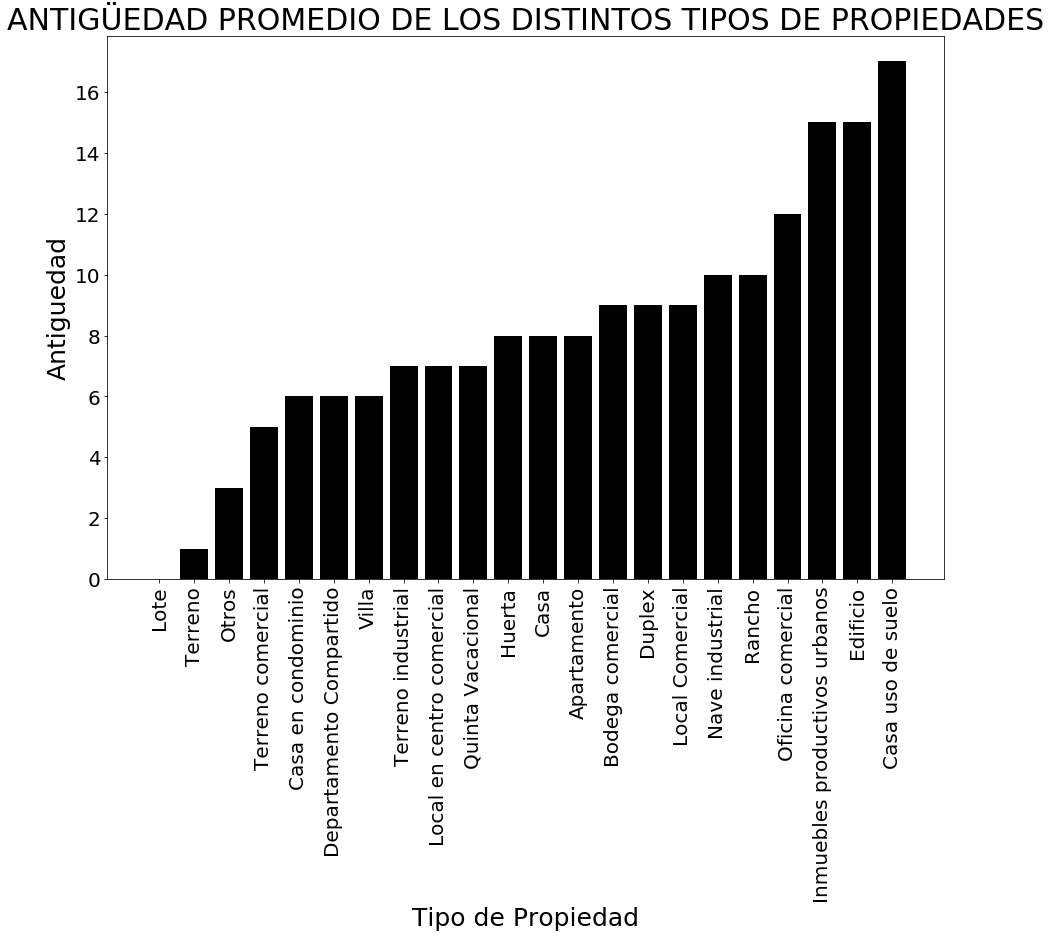

In [58]:
dfPorAntiguedad = pd.DataFrame()
dfPorAntiguedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), 
                                index = dfok['TipoPropiedad'].unique() )

dfPorAntiguedad['Antiguedad'] = dfok.groupby('TipoPropiedad')['Antiguedad'].mean()

dfPorAntiguedad = dfPorAntiguedad.dropna() #80%

dfPorAntiguedad['TipoPropiedad'] = dfPorAntiguedad['TipoPropiedad'].astype('category')
dfPorAntiguedad['Antiguedad'] = dfPorAntiguedad['Antiguedad'].astype(np.uint8)

dfPorAntiguedad = dfPorAntiguedad.sort_values(['Antiguedad'])

# Variables a graficar
y = dfPorAntiguedad['Antiguedad']
x = dfPorAntiguedad['TipoPropiedad']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10));

# Tamaño de los títulos de los ejes
plt.ylabel("Antiguedad", fontsize = 25);
plt.xlabel("Tipo de Propiedad", fontsize = 25);

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("ANTIGÜEDAD PROMEDIO DE LOS DISTINTOS TIPOS DE PROPIEDADES")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
#ldt = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, ldt(x), "g")


In [50]:
( len(dfok['TipoPropiedad']) - dfok['TipoPropiedad'].count() ) +( len(dfok['Antiguedad']) - dfok['Antiguedad'].count() )

43601